# Engagement by Post Type
This file will answer questions one and two in the README. It will compare how different text, link, photo, and video posts compare in: total amount of posts, total amount of engagement, and average engagement per post. It will also display the factuality of each of these different formats. It will lastly aggregate a combination of categories: factuality and format, to see how these combinations fair in terms of engagement score.

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.display import display_html
import warnings
warnings.simplefilter(action='ignore', category=pd.errors.SettingWithCopyWarning)

buzzfeed_df = pd.read_csv('../csv_collection/cleaned_buzzfeed_data.csv')

# Filter out the no_factual_content rows:
buzzfeed_df = buzzfeed_df[buzzfeed_df['rating'].isin(['mostly true', 'mixture of true and false', 'mostly false'])]

display(buzzfeed_df.head(3))

,account_id,post_id,category,page,post_url,date_published,post_type,rating,debate,share_count,reaction_count,comment_count,engagement_score
1,184096565021911,1035269309904628,mainstream,ABC News Politics,https://www.facebook.com/ABCNewsPolitics/posts...,2016-09-19,link,mostly true,NaN,1.0,33.0,34.0,26.25
2,184096565021911,1035305953234297,mainstream,ABC News Politics,https://www.facebook.com/ABCNewsPolitics/posts...,2016-09-19,link,mostly true,NaN,34.0,63.0,27.0,63.25
3,184096565021911,1035322636565962,mainstream,ABC News Politics,https://www.facebook.com/ABCNewsPolitics/posts...,2016-09-19,link,mostly true,NaN,35.0,170.0,86.0,120.50


First, I need three groups, one for each type of post, these groups are: total-posts, total engagement, and average engagement. Factuality of each will also be displayed. 

In [2]:
# I'll start by grouping by post_type:

post_types_counts = buzzfeed_df.groupby('post_type')['rating'].value_counts().reset_index()

engagement_totals = buzzfeed_df.groupby(['post_type', 'rating'])['engagement_score'].sum().reset_index()

#aka engagement per post:
engagement_avgs = buzzfeed_df.groupby(['post_type', 'rating'])['engagement_score'].mean().reset_index()

Next, I will filter each group into sub-groups per different post-format:

In [3]:
# For total post counts:
post_types_counts_links = post_types_counts[post_types_counts['post_type'] == 'link']
post_types_counts_photos = post_types_counts[post_types_counts['post_type'] == 'photo']
post_types_counts_texts = post_types_counts[post_types_counts['post_type'] == 'text']
post_types_counts_video = post_types_counts[post_types_counts['post_type'] == 'video']

# For total engagement:
engagement_totals_links = engagement_totals[engagement_totals['post_type'] == 'link']
engagement_totals_photos = engagement_totals[engagement_totals['post_type'] == 'photo']
engagement_totals_text = engagement_totals[engagement_totals['post_type'] == 'text']
engagement_totals_video = engagement_totals[engagement_totals['post_type'] == 'video']

# For average engagement, aka engagement per post:
engagement_avgs_links = engagement_avgs[engagement_avgs['post_type'] == 'link']
engagement_avgs_photos = engagement_avgs[engagement_avgs['post_type'] == 'photo']
engagement_avgs_text = engagement_avgs[engagement_avgs['post_type'] == 'text']
engagement_avgs_video = engagement_avgs[engagement_avgs['post_type'] == 'video']

display(engagement_avgs_links.head(3))

,post_type,rating,engagement_score
0,link,mixture of true and false,3646.074236
1,link,mostly false,4609.276316
2,link,mostly true,1367.398736


## Total amount of posts, comparison by format-count and format-factuality

Here I will display the total count of each type of post-format. For each type of post-format, I will also show what percent of those posts are mostly true, mixture of true and false, and mostly false. I'll display it in tabular and graphical formats.

Tabular display:

In [4]:
# Creatung a function to add a percent column to each type of post:
def percent_calculator(df, count_col='count', new_col='percent_of_posts'):
    total = df[count_col].sum()
    df[new_col] = (df[count_col] / total) * 100
    return df

post_types_counts_links = percent_calculator(post_types_counts_links)
post_types_counts_photos = percent_calculator(post_types_counts_photos)
post_types_counts_texts = percent_calculator(post_types_counts_texts)
post_types_counts_video = percent_calculator(post_types_counts_video)

# Sorting by count:
post_types_counts_links = post_types_counts_links.sort_values(by='count', ascending=False)
post_types_counts_photos = post_types_counts_photos.sort_values(by='count', ascending=False)
post_types_counts_texts = post_types_counts_texts.sort_values(by='count', ascending=False)
post_types_counts_video = post_types_counts_video.sort_values(by='count', ascending=False)

# Configuring for easier viewing:
df_blocks = [
    f"<div style='display: inline-block; width: 45%; vertical-align: top; margin: 10px'><h3>Links</h3>{post_types_counts_links.to_html(index=False)}</div>",
    f"<div style='display: inline-block; width: 45%; vertical-align: top; margin: 10px'><h3>Photos</h3>{post_types_counts_photos.to_html(index=False)}</div>",
    f"<div style='display: inline-block; width: 45%; vertical-align: top; margin: 10px'><h3>Text</h3>{post_types_counts_texts.to_html(index=False)}</div>",
    f"<div style='display: inline-block; width: 45%; vertical-align: top; margin: 10px'><h3>Video</h3>{post_types_counts_video.to_html(index=False)}</div>"
]
row1 = df_blocks[0] + df_blocks[1]
row2 = df_blocks[2] + df_blocks[3]
display_html(f"<div>{row1}</div><div>{row2}</div>", raw=True)
print('Overall Totals:')
display(post_types_counts.sort_values(by='count', ascending=False))

post_type,rating,count,percent_of_posts
link,mostly true,1385,81.041545
link,mixture of true and false,229,13.399649
link,mostly false,95,5.558806
post_type,rating,count,percent_of_posts
photo,mostly true,63,80.769231
photo,mostly false,9,11.538462
photo,mixture of true and false,6,7.692308
post_type,rating,count,percent_of_posts
text,mostly true,3,75.0
text,mixture of true and false,1,25.0


Overall Totals:


,post_type,rating,count
0,link,mostly true,1385
1,link,mixture of true and false,229
8,video,mostly true,218
2,link,mostly false,95
3,photo,mostly true,63
4,photo,mostly false,9
9,video,mixture of true and false,9
5,photo,mixture of true and false,6
6,text,mostly true,3
7,text,mixture of true and false,1


Graphical display:

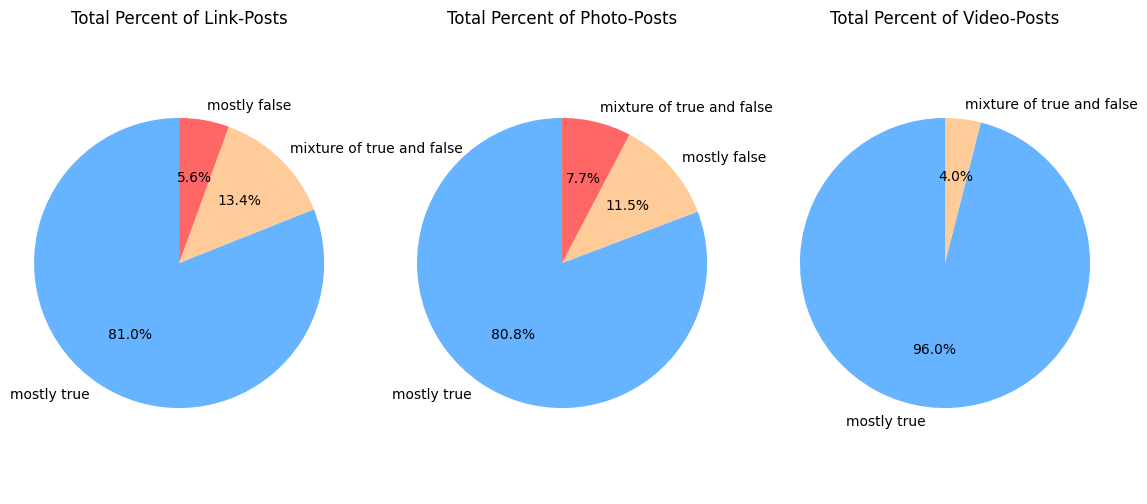

In [ ]:
# Note, text posts will be excluded from the graphical analysis, as they compose such a small amount of posts and engagement.

# Graphical display:

# Creating colors, labels, and sizes for the pie graphs:
colors = ['#66b3ff', '#ffcc99', '#ff6666']

links_labels = post_types_counts_links['rating']
link_sizes = post_types_counts_links['percent_of_posts']

photo_labels = post_types_counts_photos['rating']
photo_sizes = post_types_counts_photos['percent_of_posts']

text_labels = post_types_counts_texts['rating']
text_sizes = post_types_counts_texts['percent_of_posts']

video_labels = post_types_counts_video['rating']
video_sizes = post_types_counts_video['percent_of_posts']

# Graphing:
plt.figure(figsize=(14, 6))

plt.subplot(1, 3, 1)
ax1 = plt.pie(
    link_sizes,
    labels= links_labels,
    autopct='%1.1f%%',
    startangle=90,
    colors=colors
)
plt.title("Total Percent of Link-Posts")
plt.axis('equal')

plt.subplot(1, 3, 2)
ax2 = plt.pie(
    photo_sizes,
    labels= photo_labels,
    autopct='%1.1f%%',
    startangle=90,
    colors=colors
)
plt.title("Total Percent of Photo-Posts")
plt.axis('equal')

plt.subplot(1, 3, 3)
ax3 = plt.pie(
    video_sizes,
    labels= video_labels,
    autopct='%1.1f%%',
    startangle=90,
    colors=colors
)
plt.title("Total Percent of Video-Posts")
plt.axis('equal')


plt.show();

Total Post Count Summary: As seen from the charts and graphs, posts with links are by far the most common, followed by videos, then photos, then plain text posts are relatively non-existent compared to the other formats. Photo and link posts are very similar in the percent of their posts that are factual, with both of them having 81% mostly true. Video posts are the most factual by a large margin.

## Total engagement comparison, sorted by type of post and how factual each type is. 

In tabular format:

In [6]:
engagement_totals_links = engagement_totals_links.sort_values(by='engagement_score', ascending=False)
engagement_totals_photos= engagement_totals_photos.sort_values(by='engagement_score', ascending=False)
engagement_totals_text = engagement_totals_text.sort_values(by='engagement_score', ascending=False)
engagement_totals_video = engagement_totals_video.sort_values(by='engagement_score', ascending=False)


df_blocks = [
    f"<div style='display: inline-block; width: 45%; vertical-align: top; margin: 10px'><h3>Links</h3>{engagement_totals_links.to_html(index=False)}</div>",
    f"<div style='display: inline-block; width: 45%; vertical-align: top; margin: 10px'><h3>Photos</h3>{engagement_totals_photos.to_html(index=False)}</div>",
    f"<div style='display: inline-block; width: 45%; vertical-align: top; margin: 10px'><h3>Text</h3>{engagement_totals_text.to_html(index=False)}</div>",
    f"<div style='display: inline-block; width: 45%; vertical-align: top; margin: 10px'><h3>Video</h3>{engagement_totals_video.to_html(index=False)}</div>"
]

row1 = df_blocks[0] + df_blocks[1]
row2 = df_blocks[2] + df_blocks[3]

display_html(f"<div>{row1}</div><div>{row2}</div>", raw=True)
display(engagement_totals.sort_values(by='engagement_score', ascending=False))

post_type,rating,engagement_score
link,mostly true,1893847.25
link,mixture of true and false,834951.00
link,mostly false,437881.25
post_type,rating,engagement_score
photo,mostly true,1132810.25
photo,mostly false,109485.75
photo,mixture of true and false,105019.50
post_type,rating,engagement_score
text,mostly true,113.00
text,mixture of true and false,18.25


,post_type,rating,engagement_score
2,link,mostly true,1893847.25
9,video,mostly true,1221601.75
5,photo,mostly true,1132810.25
0,link,mixture of true and false,834951.00
8,video,mixture of true and false,757911.50
1,link,mostly false,437881.25
4,photo,mostly false,109485.75
3,photo,mixture of true and false,105019.50
7,text,mostly true,113.00
6,text,mixture of true and false,18.25


In graphical format:

/var/folders/wr/ngy9lj557nl6cpv0nwkv2fkh0000gn/T/ipykernel_34411/2467087307.py:65: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax3.set_xticklabels(['Mostly true', 'Mixture of true and false'])


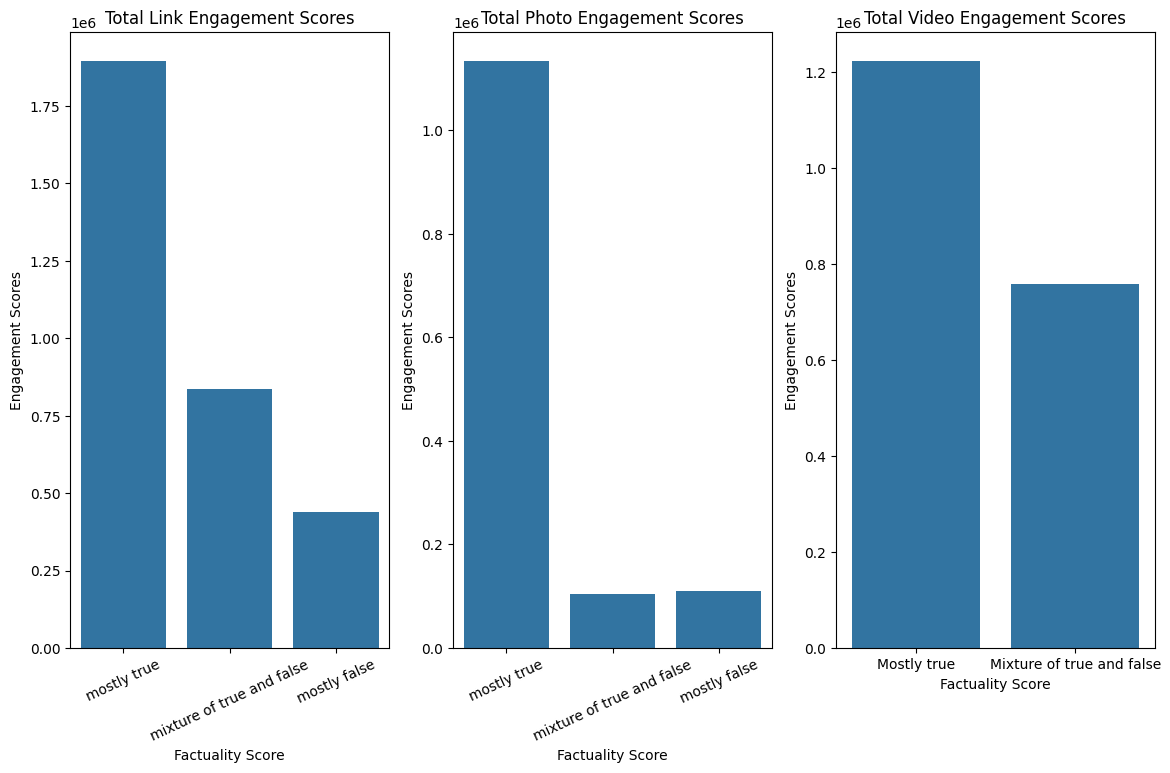

In [7]:
# Creating a ranking order:
rating = [
    "mostly true",
    "mixture of true and false",
    "mostly false"
]

# Creating a function and applying the ranking order:
def prepare_df(df):
    df['rating'] = pd.Categorical(
        df['rating'],
        categories=rating,
        ordered=True
    )
    df['rating_num'] = df['rating'].cat.codes
    return df

engagement_totals_links = prepare_df(engagement_totals_links)
engagement_totals_photos = prepare_df(engagement_totals_photos)
engagement_totals_video = prepare_df(engagement_totals_video)


# Graphing:
plt.figure(figsize=(14, 8))

plt.subplot(1, 3, 1)
ax1 = sns.barplot(
    x='rating_num',
    y='engagement_score',
    data=engagement_totals_links,
)
plt.xticks(
    ticks=range(len(rating)),
    labels=rating,
    rotation=25

)
plt.ylabel('Engagement Scores')
plt.xlabel('Factuality Score')
plt.title('Total Link Engagement Scores')

plt.subplot(1, 3, 2)
ax2 = sns.barplot(
    x='rating_num',
    y='engagement_score',
    data=engagement_totals_photos,
)
plt.xticks(
    ticks=range(len(rating)),
    labels=rating,
    rotation=25
)
plt.xlabel('Factuality Score')
plt.ylabel('Engagement Scores')
plt.ylim(bottom=-100)
plt.title('Total Photo Engagement Scores')

plt.subplot(1, 3, 3)
ax3 = sns.barplot(
    x='rating_num',
    y='engagement_score',
    data=engagement_totals_video,
)
plt.xlabel('Factuality Score')
ax3.set_xticklabels(['Mostly true', 'Mixture of true and false'])
plt.title('Total Video Engagement Scores')
plt.ylabel('Engagement Scores')


plt.show();

Total Engagement Score Summary: Unsuprisingly, link-posts created the most engagement, as they also comprise the most total amount of posts. However, photo and video posts make a suprisingly huge amount of total engagement, considering how far fewer posts there are of them. 

## Average engagements (aka engagement per post), comparing average engagement between different post types, along with their factuality.

In tabular format:

In [8]:
engagement_avgs_links = engagement_avgs_links.sort_values(by='engagement_score', ascending=False)
engagement_avgs_photos= engagement_avgs_photos.sort_values(by='engagement_score', ascending=False)
engagement_avgs_text = engagement_avgs_text.sort_values(by='engagement_score', ascending=False)
engagement_avgs_video = engagement_avgs_video.sort_values(by='engagement_score', ascending=False)

# Format each DataFrame with a label
df_blocks = [
    f"<div style='display: inline-block; width: 45%; vertical-align: top; margin: 10px'><h3>Links</h3>{engagement_avgs_links.to_html(index=False)}</div>",
    f"<div style='display: inline-block; width: 45%; vertical-align: top; margin: 10px'><h3>Photos</h3>{engagement_avgs_photos.to_html(index=False)}</div>",
    f"<div style='display: inline-block; width: 45%; vertical-align: top; margin: 10px'><h3>Text</h3>{engagement_avgs_text.to_html(index=False)}</div>",
    f"<div style='display: inline-block; width: 45%; vertical-align: top; margin: 10px'><h3>Video</h3>{engagement_avgs_video.to_html(index=False)}</div>"
]

# Group into two rows
row1 = df_blocks[0] + df_blocks[1]
row2 = df_blocks[2] + df_blocks[3]

# Display both rows as separate HTML blocks
display_html(f"<div>{row1}</div><div>{row2}</div>", raw=True)
display(engagement_avgs.sort_values(by='engagement_score', ascending=False))

# (The higher the rating the number, the more false a post type is.)

post_type,rating,engagement_score
link,mostly false,4609.276316
link,mixture of true and false,3646.074236
link,mostly true,1367.398736
post_type,rating,engagement_score
photo,mostly true,17981.115079
photo,mixture of true and false,17503.250000
photo,mostly false,12165.083333
post_type,rating,engagement_score
text,mostly true,37.666667
text,mixture of true and false,18.250000


,post_type,rating,engagement_score
8,video,mixture of true and false,84212.388889
5,photo,mostly true,17981.115079
3,photo,mixture of true and false,17503.250000
4,photo,mostly false,12165.083333
9,video,mostly true,5603.677752
1,link,mostly false,4609.276316
0,link,mixture of true and false,3646.074236
2,link,mostly true,1367.398736
7,text,mostly true,37.666667
6,text,mixture of true and false,18.250000


In graphical format:

/var/folders/wr/ngy9lj557nl6cpv0nwkv2fkh0000gn/T/ipykernel_34411/2937753229.py:49: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax3.set_xticklabels(['Mostly true', 'Mixture of true and false'])


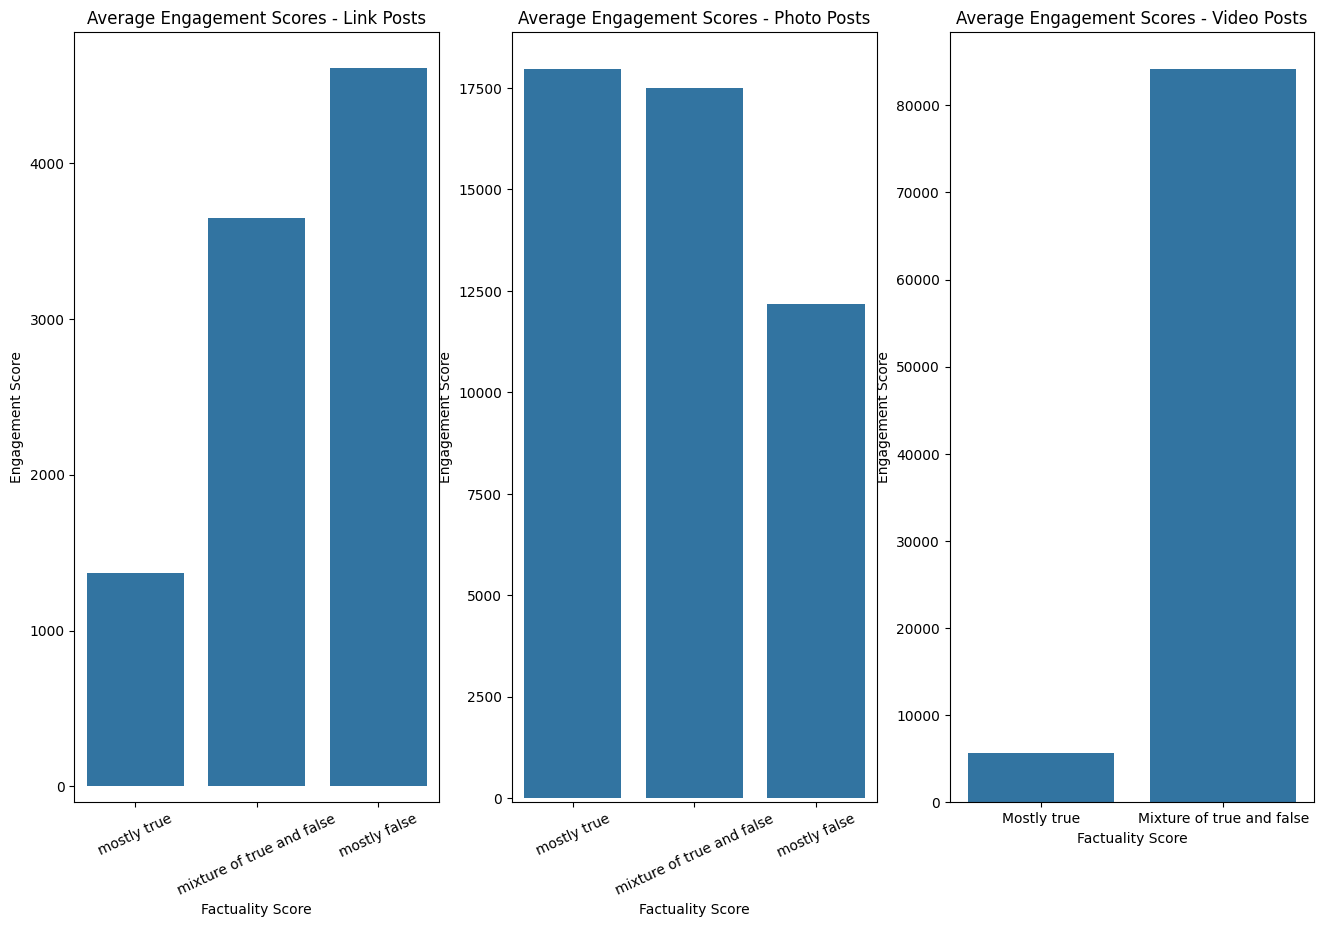

In [9]:
# Sorting by factuality:
engagement_avgs_links = prepare_df(engagement_avgs_links)
engagement_avgs_photos = prepare_df(engagement_avgs_photos)
engagement_avgs_video= prepare_df(engagement_avgs_video)

# Graphing:
plt.figure(figsize=(16, 10))

plt.subplot(1, 3, 1)
ax1 = sns.barplot(
    x='rating_num',
    y='engagement_score',
    data=engagement_avgs_links,
)
plt.xticks(
    ticks=range(len(rating)),
    labels=rating,
    rotation=25

)
plt.ylim(bottom=-100)
plt.xlabel('Factuality Score')
plt.ylabel('Engagement Score')
plt.title('Average Engagement Scores - Link Posts')

plt.subplot(1, 3, 2)
ax2 = sns.barplot(
    x='rating_num',
    y='engagement_score',
    data=engagement_avgs_photos,
)
plt.xticks(
    ticks=range(len(rating)),
    labels=rating,
    rotation=25

)
plt.ylim(bottom=-100)
plt.xlabel('Factuality Score')
plt.ylabel('Engagement Score')
plt.title('Average Engagement Scores - Photo Posts')

plt.subplot(1, 3, 3)
ax3 = sns.barplot(
    x='rating_num',
    y='engagement_score',
    data=engagement_avgs_video,
)
ax3.set_xticklabels(['Mostly true', 'Mixture of true and false'])

plt.xlabel('Factuality Score')
plt.ylabel('Engagement Score')
plt.title('Average Engagement Scores - Video Posts')

plt.show();

Average Engagement Score Summary: Video and link posts increase in engagement as their factuality decreases, however photos follow the opposite trend. It's interesting that links are less trustworthy as photos, and seeing as links are more popular in terms of total engagement, this makes for a unfactual combination that is extremely prevelant. 

## Aggregated Summaries

Now that I've compared how each format of post is broken down by count, engagement totals, and engagement averages with factuality as a control, I want to compare:
- Which type of post-format generates the most engagement in total?
- Which type of post-format generates the most engagement on average?

- Which type of post - ie. what format and what factuality combination, creates the most engagement total?
- Which type of post - ie. what format and what factuality combination, creates the most engagement on average?
- What type of factuality is having the most total engagement?
- What type of factuality is having the most engagement on average?

In [10]:
# Creating the appropriate groups:

# Engagement totals:
summarized_engagement_totals = engagement_totals.groupby('post_type')['engagement_score'].sum().reset_index()

# Engagement averages:
summarized_engagement_avgs = engagement_avgs.groupby('post_type')['engagement_score'].sum().reset_index()

# Aggregating by engagement score on rating and post type:
factuality_format_df = (buzzfeed_df.groupby(['rating', 'post_type']).agg(
    factuality_total_eng = ('engagement_score', 'sum'),
    factuality_eng_avg = ('engagement_score', 'mean')
).reset_index())
sorted_format_factuality = factuality_format_df.sort_values(by='factuality_total_eng', ascending=False)

# Aggregating by engagement score on rating:
factuality_df = (buzzfeed_df.groupby('rating').agg(
    factuality_total_eng = ('engagement_score', 'sum'),
    factuality_eng_avg = ('engagement_score', 'mean')
).reset_index())
sorted_factuality_df = factuality_df.sort_values(by='factuality_eng_avg', ascending=False)

In [11]:
# testing:

# display(summarized_engagement_totals.head(3))

# display(summarized_engagement_avgs.head(3))

# display(factuality_format_df.head(20))

display(factuality_df.head(20))


,rating,factuality_total_eng,factuality_eng_avg
0,mixture of true and false,1697900.25,6930.205102
1,mostly false,547367.00,5263.144231
2,mostly true,4248372.25,2545.459706


In [12]:
# Filtering and sorting:

# Getting rid of the text rows:
summarized_engagement_totals = summarized_engagement_totals[summarized_engagement_totals['post_type'].isin(['link', 'photo', 'video'])]
summarized_engagement_avgs = summarized_engagement_avgs[summarized_engagement_avgs['post_type'].isin(['link', 'photo', 'video'])]
sorted_format_factuality = sorted_format_factuality[sorted_format_factuality['post_type'].isin(['video', 'link', 'photo'])]

# Preparing for the graphs by creating combined columns and sorting by columns:
sorted_format_factuality['label'] = sorted_format_factuality['rating'] + ' | ' + sorted_format_factuality['post_type']
re_sorted_sorted_format_factuality = sorted_format_factuality.sort_values(by='factuality_eng_avg', ascending=False)
factuality_df = factuality_df.sort_values(by='factuality_eng_avg', ascending=False)
factuality_df = prepare_df(factuality_df)

Engagement Totals:


,post_type,engagement_score
0,link,3166679.50
1,photo,1347315.50
3,video,1979513.25


Engagement Averages:


,post_type,engagement_score
0,link,9622.749288
1,photo,47649.448413
3,video,89816.066641


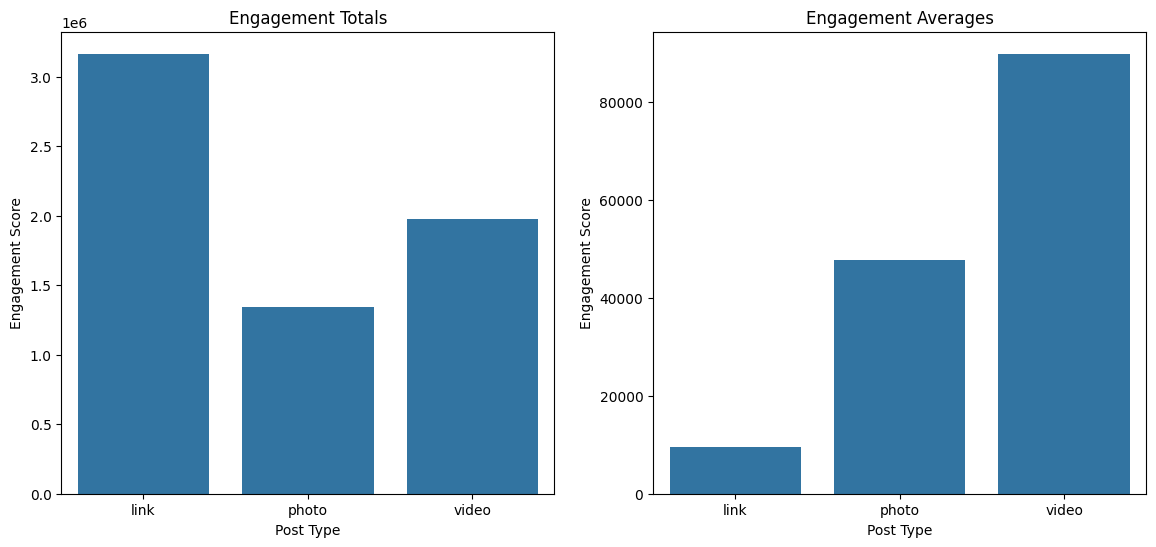

In [13]:
# Format totals and averages: questions 1 and 2

plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
ax1 = sns.barplot(
    x='post_type',
    y='engagement_score',
    data=summarized_engagement_totals
)
plt.xlabel('Post Type')
plt.ylabel('Engagement Score')
plt.title('Engagement Totals')

plt.subplot(1, 2, 2)
ax2 = sns.barplot(
    x='post_type',
    y='engagement_score',
    data=summarized_engagement_avgs
)
plt.xlabel('Post Type')
plt.ylabel('Engagement Score')
plt.title('Engagement Averages')

print('Engagement Totals:')
display(summarized_engagement_totals.head(9))
print('Engagement Averages:')
display(summarized_engagement_avgs.head(3))

plt.show();

Grouped by post type and factuality combination:


,rating,post_type,factuality_total_eng,factuality_eng_avg,label
6,mostly true,link,1893847.25,1367.398736,mostly true | link
9,mostly true,video,1221601.75,5603.677752,mostly true | video
7,mostly true,photo,1132810.25,17981.115079,mostly true | photo
0,mixture of true and false,link,834951.00,3646.074236,mixture of true and false | link
3,mixture of true and false,video,757911.50,84212.388889,mixture of true and false | video
4,mostly false,link,437881.25,4609.276316,mostly false | link
5,mostly false,photo,109485.75,12165.083333,mostly false | photo
1,mixture of true and false,photo,105019.50,17503.250000,mixture of true and false | photo


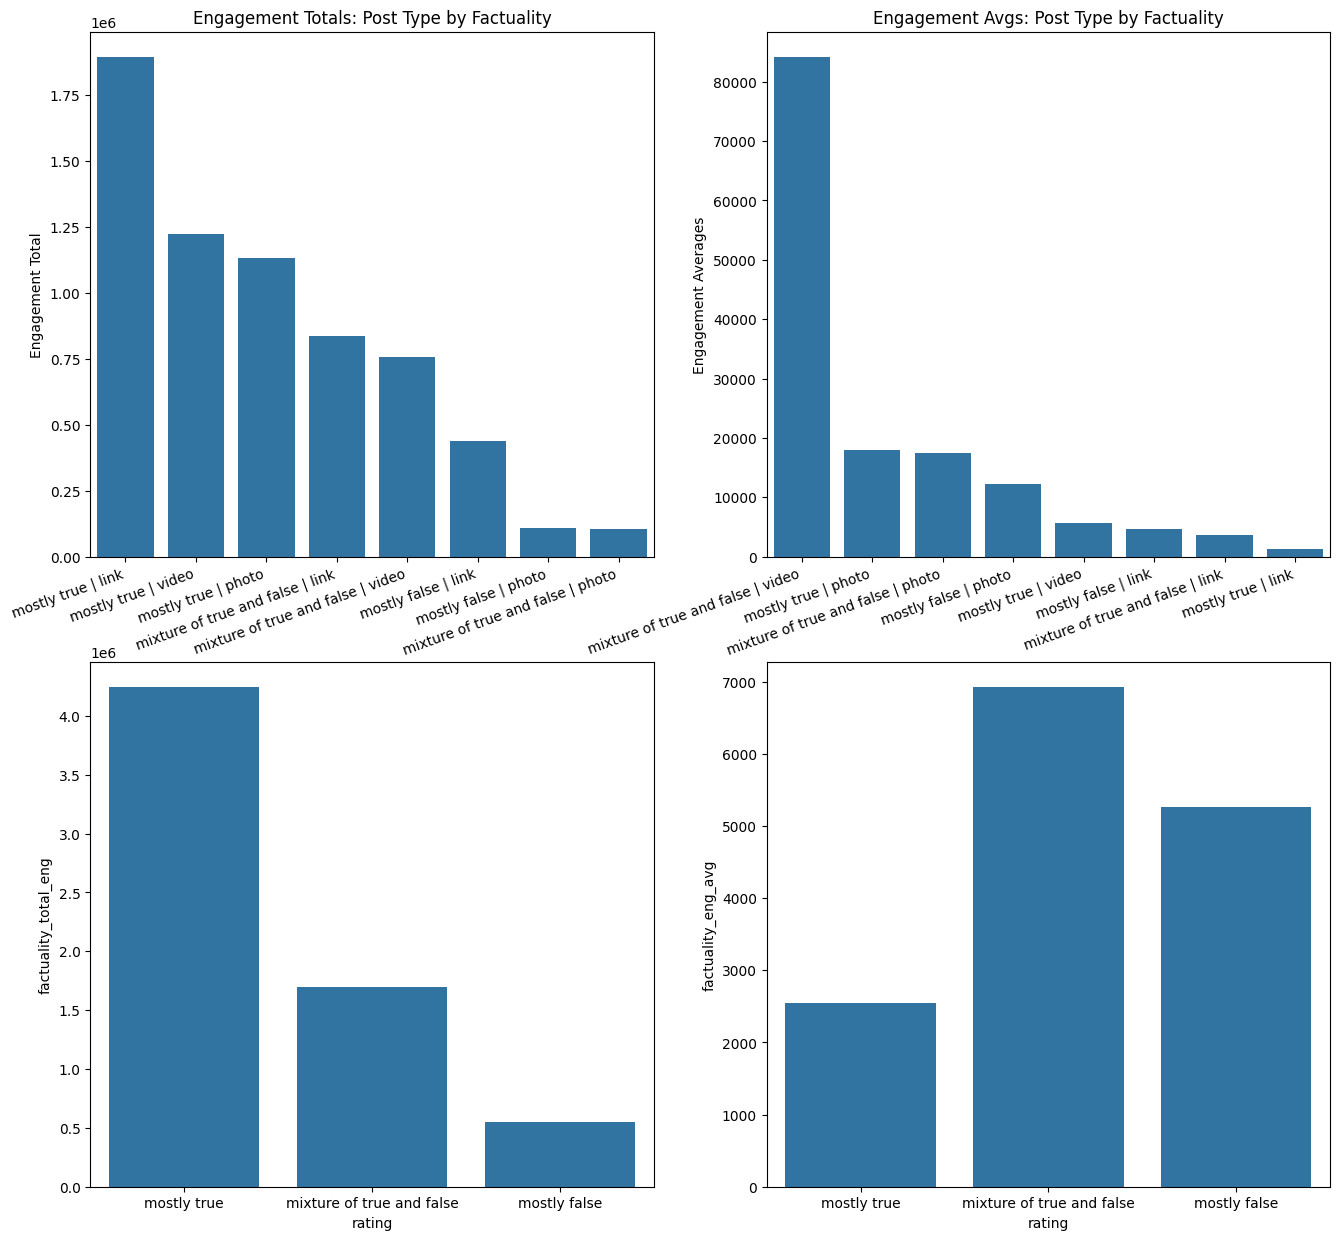

In [14]:
# Total and average engagement scores, for type of factuality, and for post type/type of factuality combination
plt.figure(figsize=(16, 15))

plt.subplot(2, 2, 1)
ax1 = sns.barplot(
    x='label',
    y='factuality_total_eng',
    data=sorted_format_factuality
)
plt.xticks(
    rotation=20,
    ha='right',
    fontsize=10
)
plt.xlabel('Post Type')
plt.ylabel('Engagement Total')
plt.title('Engagement Totals: Post Type by Factuality')

plt.subplot(2, 2, 2)
ax2 = sns.barplot(
    x='label',
    y= 'factuality_eng_avg',
    data= re_sorted_sorted_format_factuality
)
plt.xticks(
    rotation=20,
    ha='right',
    fontsize=10
)
plt.xlabel('Post Type')
plt.ylabel('Engagement Averages')
plt.title('Engagement Avgs: Post Type by Factuality')


plt.subplot(2, 2, 3)
ax3 = sns.barplot(
    x='rating',
    y='factuality_total_eng',
    data=factuality_df
)

plt.subplot(2, 2, 4)
ax4 = sns.barplot(
    x='rating',
    y='factuality_eng_avg',
    data=factuality_df
)

print('Grouped by post type and factuality combination:')
display(sorted_format_factuality.head(9))

plt.show();

## Final Summary
Most of this file was focused on organizing the data by format type, i.e. what type of post it was (link, photo, video, or text), in order to see what style of posts were generating the most misinformation, and which were the most factual. What type of factuality was most pervasive was also studied independently, and then these factors were combined to find aggregaed summaries. I'll start with posts by format type:
- Posts with links are the most common, followed by videos then photos, and plain text posts were very rare.
- Posts with links gained the most engagement in total, followed by videos, then photos.
- Posts with videos gain the most engagement per post, followed by photos, then links.

Of these different types of posts, videos were the most factual, and posts with links and photos are equally factual.

In terms of factuality by itself:
- Mostly true posts generate the least amount of engagement on average, and a mixture of true and false gain the most engagement. 
- Mostly true posts are by far the most common, and mostly false are the least common.

When these two factor are combined, factuality and post type tend to create predictable outcomes:
- Mostly true links are most common,.
- Mixture of true and false videos perform the best.
However, there are some slightly suprising outcomes from the combinations:
- Mostly false photos have a higher total engagement, suggesting this is an especially common post-combination.
- The average engagement of; mixture of true and false with videos, is much grater than the sum of their own average engagement scores, making this a particularily powerful post type.
